In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import dask
%config InlineBackend.figure_format = 'retina'

In [2]:
from tqdm import tqdm
import pygrib

In [3]:
import netCDF4
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists

In [4]:
import cartopy as cp
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

In [15]:
def plot_random_patch(patches,index=None):
    if index is None:
        r = np.random.randint(0,patches.n_samples.max())
    else:
        r = index
    keys = list(patches.variables.keys())
    keys.sort()
    remove_list = ['mesh','meshfrac','mesh_90','mesh_90_mean','mesh_90_std','mesh_90_percentiles','time','lon','lat','longitude','longitude2','latitude','latitude2']
    for one in remove_list:
        keys.remove(one)
        
    fig,axes = plt.subplots(4,5,figsize=(20,15))
    axes = axes.ravel()
    
    for i,ax in enumerate(axes):
        if i < 17:
            pm = ax.imshow(patches[keys[i]].values[r,:,:],cmap='cividis')
            ax.set_title(keys[i])
            plt.colorbar(pm,ax=ax,shrink=0.75)
        elif i == 17:
            pm = ax.imshow(patches['mesh'].values[r,:,:],cmap='Reds',vmin=0,vmax=3)
            ax.set_title('mesh')
            plt.colorbar(pm,ax=ax,shrink=0.75)
        elif i == 18:
            pm = ax.imshow(patches['mesh_90'].values[r,:,:],cmap='Blues',vmin=0,vmax=25)
            ax.set_title('mesh')
            plt.colorbar(pm,ax=ax,shrink=0.75)
            
    axes[-1].axis(False)
    if index is None:
        plt.suptitle('image index {}'.format(r))
    plt.tight_layout()

In [7]:
#plot random patches
patches = xr.open_mfdataset('c:/Users/jorda/hagelslag/images_for_learning/parallel_run00*.nc',parallel=False,concat_dim='n_samples',combine='nested')
patches

<xarray.Dataset>
Dimensions:              (dim_0: 1, n_samples: 48581, qunatile2: 7, x: 32, y: 32)
Coordinates:
    longitude            (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    latitude             (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    longitude2           (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    latitude2            (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
Dimensions without coordinates: dim_0, n_samples, qunatile2, x, y
Data variables: (12/25)
    temp_sfc             (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    dewtemp_sfc          (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    w_sfc                (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    u_sfc                (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    v_sfc                (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    graup_sfc            (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    ...                   ...
    time                 (n_samples, dim_0) datetime64[ns] dask.array<chunksize=(250, 1), meta=np.ndarray>
    lon                  (n_samples, dim_0) float64 dask.array<chunksize=(250, 1), meta=np.ndarray>
    lat                  (n_samples, dim_0) float64 dask.array<chunksize=(250, 1), meta=np.ndarray>
    mesh_90_mean         (n_samples, dim_0) float64 dask.array<chunksize=(250, 1), meta=np.ndarray>
    mesh_90_std          (n_samples, dim_0) float64 dask.array<chunksize=(250, 1), meta=np.ndarray>
    mesh_90_percentiles  (n_samples, dim_0, qunatile2) float64 dask.array<chunksize=(250, 1, 7), meta=np.ndarray>

In [16]:
#read in patches 0019
patches19 = xr.open_mfdataset('c:/Users/jorda/hagelslag/images_for_learning/parallel_run0019_2.nc',parallel=False,concat_dim='n_samples',combine='nested')
patches19

<xarray.Dataset>
Dimensions:              (dim_0: 1, n_samples: 250, qunatile2: 7, x: 32, y: 32)
Coordinates:
    longitude            (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    latitude             (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    longitude2           (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    latitude2            (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
Dimensions without coordinates: dim_0, n_samples, qunatile2, x, y
Data variables: (12/26)
    temp_sfc             (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    dewtemp_sfc          (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    w_sfc                (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    u_sfc                (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    v_sfc                (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    graup_sfc            (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    ...                   ...
    time                 (n_samples, dim_0) datetime64[ns] dask.array<chunksize=(250, 1), meta=np.ndarray>
    lon                  (n_samples, dim_0) float64 dask.array<chunksize=(250, 1), meta=np.ndarray>
    lat                  (n_samples, dim_0) float64 dask.array<chunksize=(250, 1), meta=np.ndarray>
    mesh_90_mean         (n_samples, dim_0) float64 dask.array<chunksize=(250, 1), meta=np.ndarray>
    mesh_90_std          (n_samples, dim_0) float64 dask.array<chunksize=(250, 1), meta=np.ndarray>
    mesh_90_percentiles  (n_samples, dim_0, qunatile2) float64 dask.array<chunksize=(250, 1, 7), meta=np.ndarray>

In [11]:
patches.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:              (dim_0: 1, n_samples: 48581, qunatile2: 7, x: 32, y: 32)
Coordinates:
    longitude            (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    latitude             (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    longitude2           (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    latitude2            (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
Dimensions without coordinates: dim_0, n_samples, qunatile2, x, y
Data variables: (12/25)
    temp_sfc             (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    dewtemp_sfc          (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    w_sfc                (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    u_sfc                (n_samples, x

In [40]:
cin = patches.cin

In [9]:
patches.cin.shape

(48581, 32, 32)

In [10]:
patches.longitude.shape

(48581, 32, 32)

In [12]:
patches.latitude.shape

(48581, 32, 32)

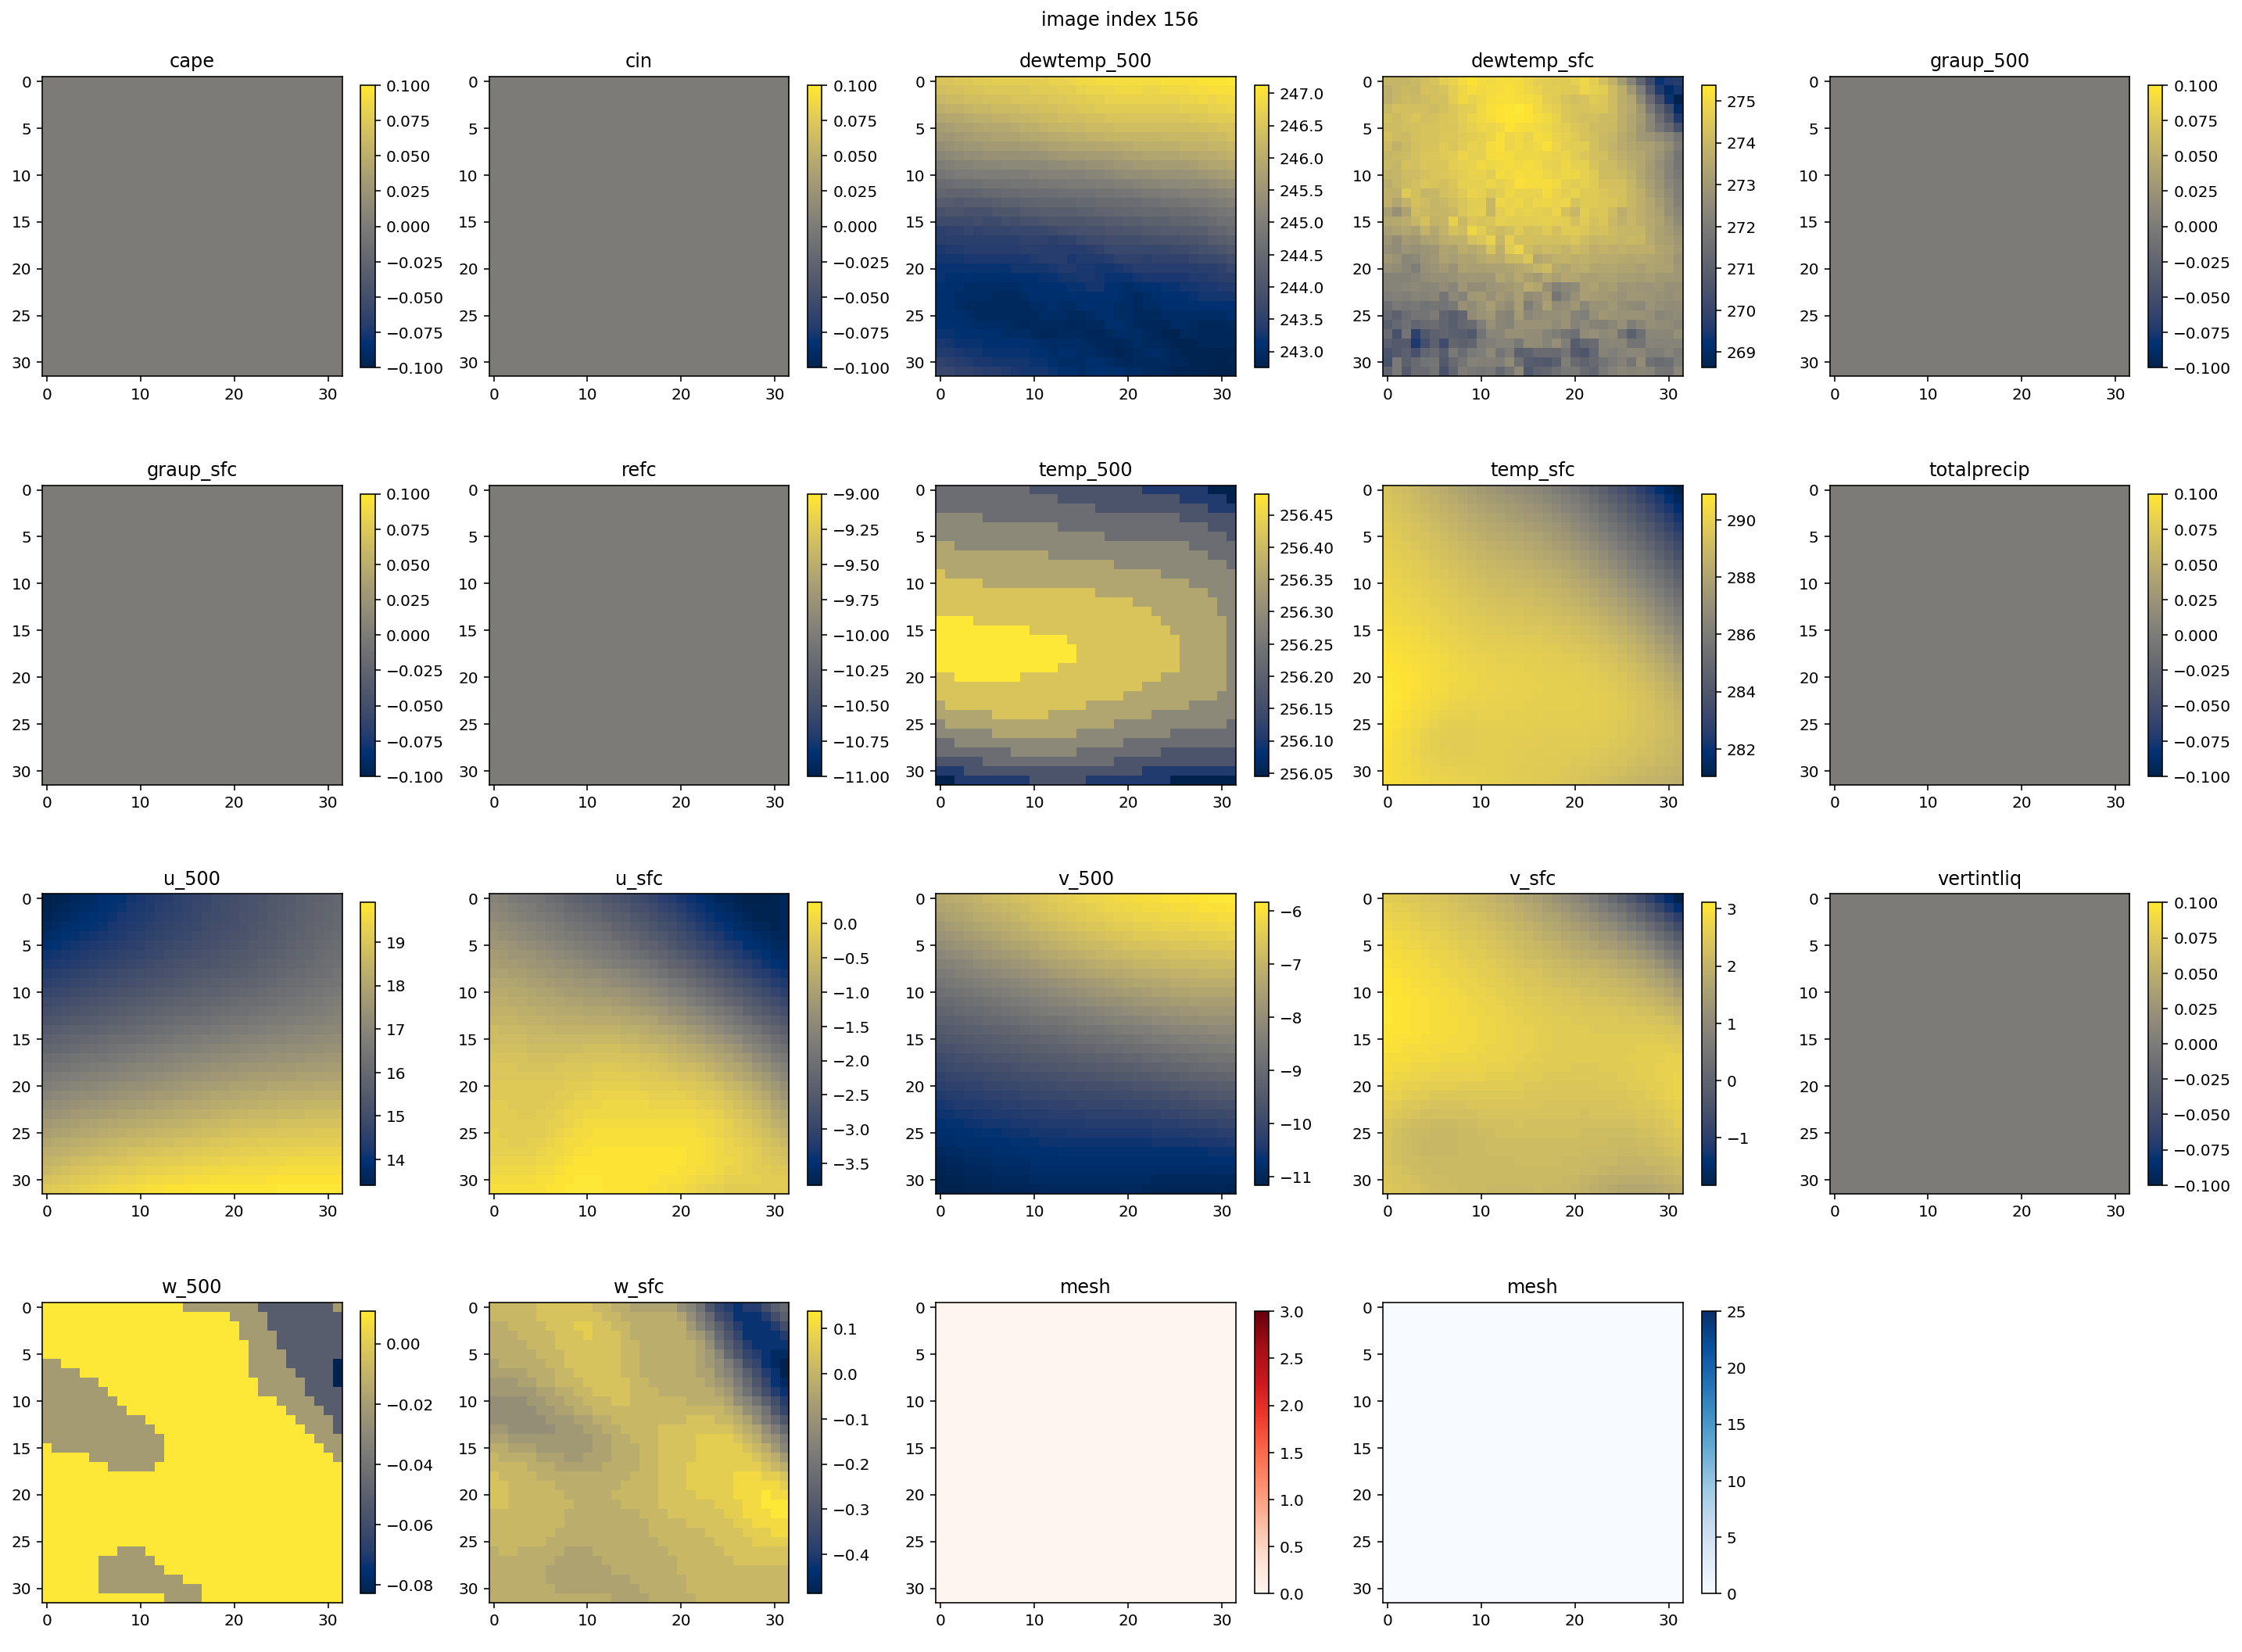

In [17]:
plot_random_patch(patches19)

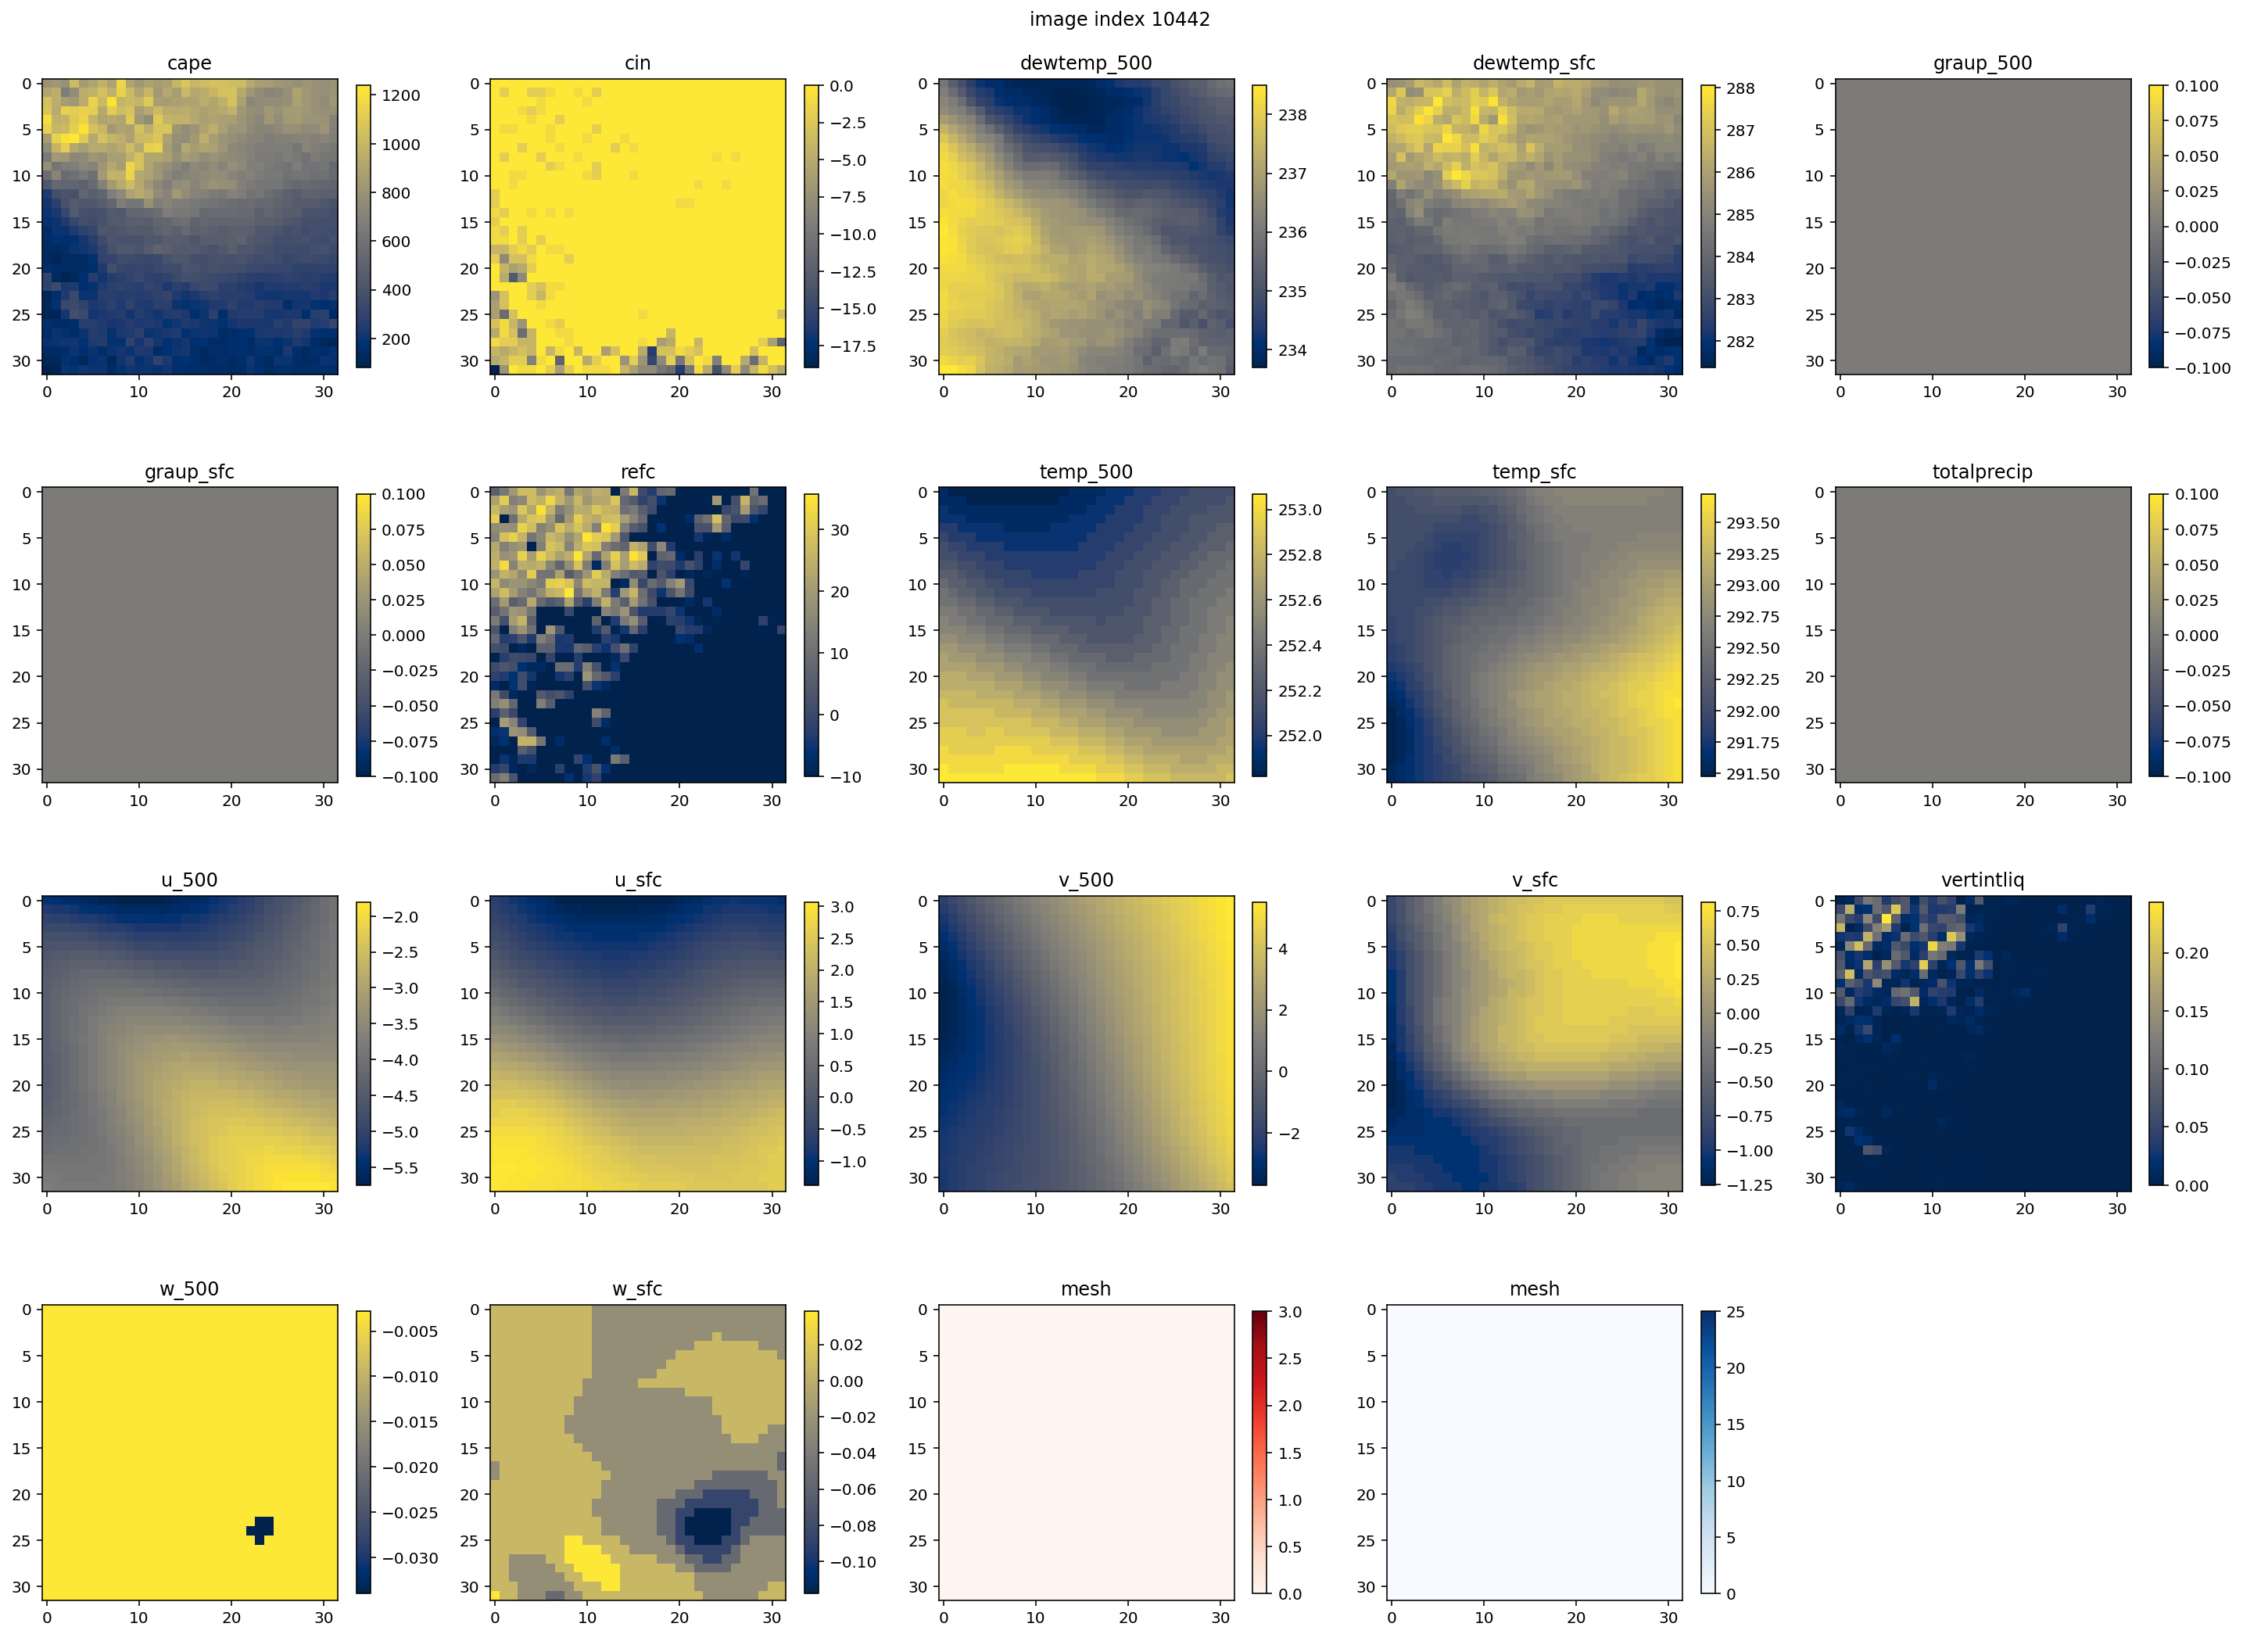

In [8]:
plot_random_patch(patches)

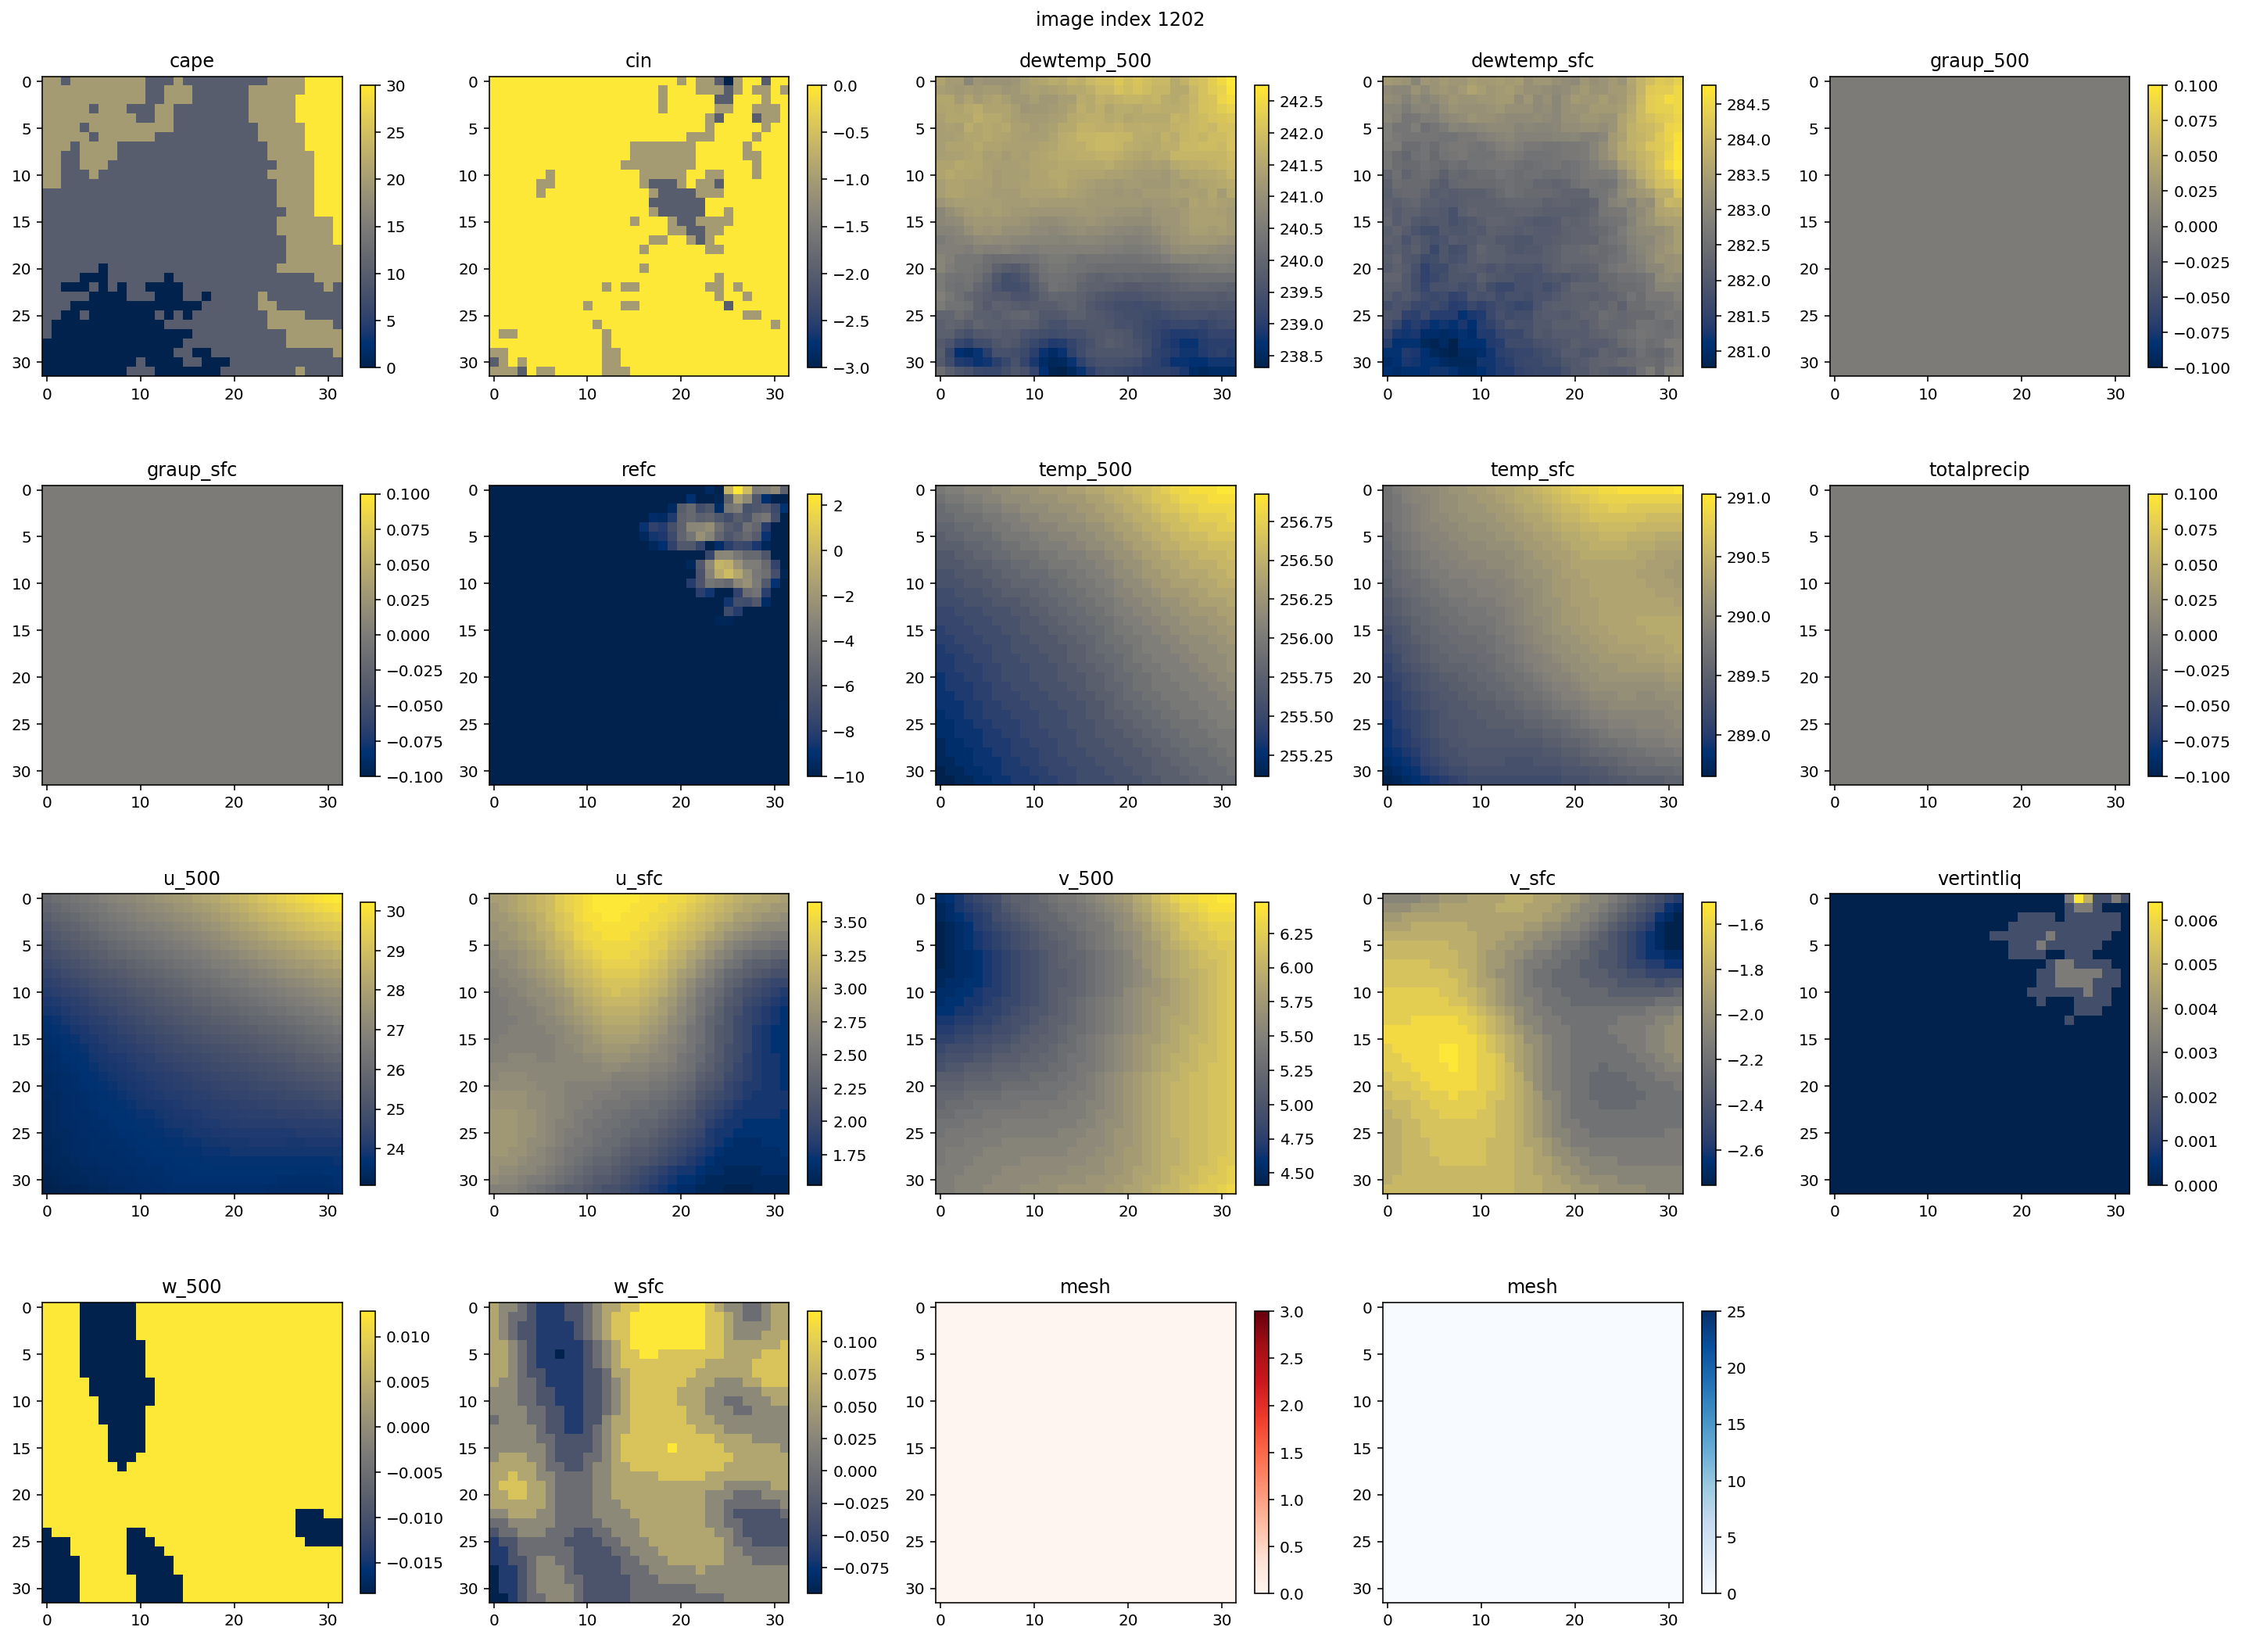

In [5]:
plot_random_patch(patches)

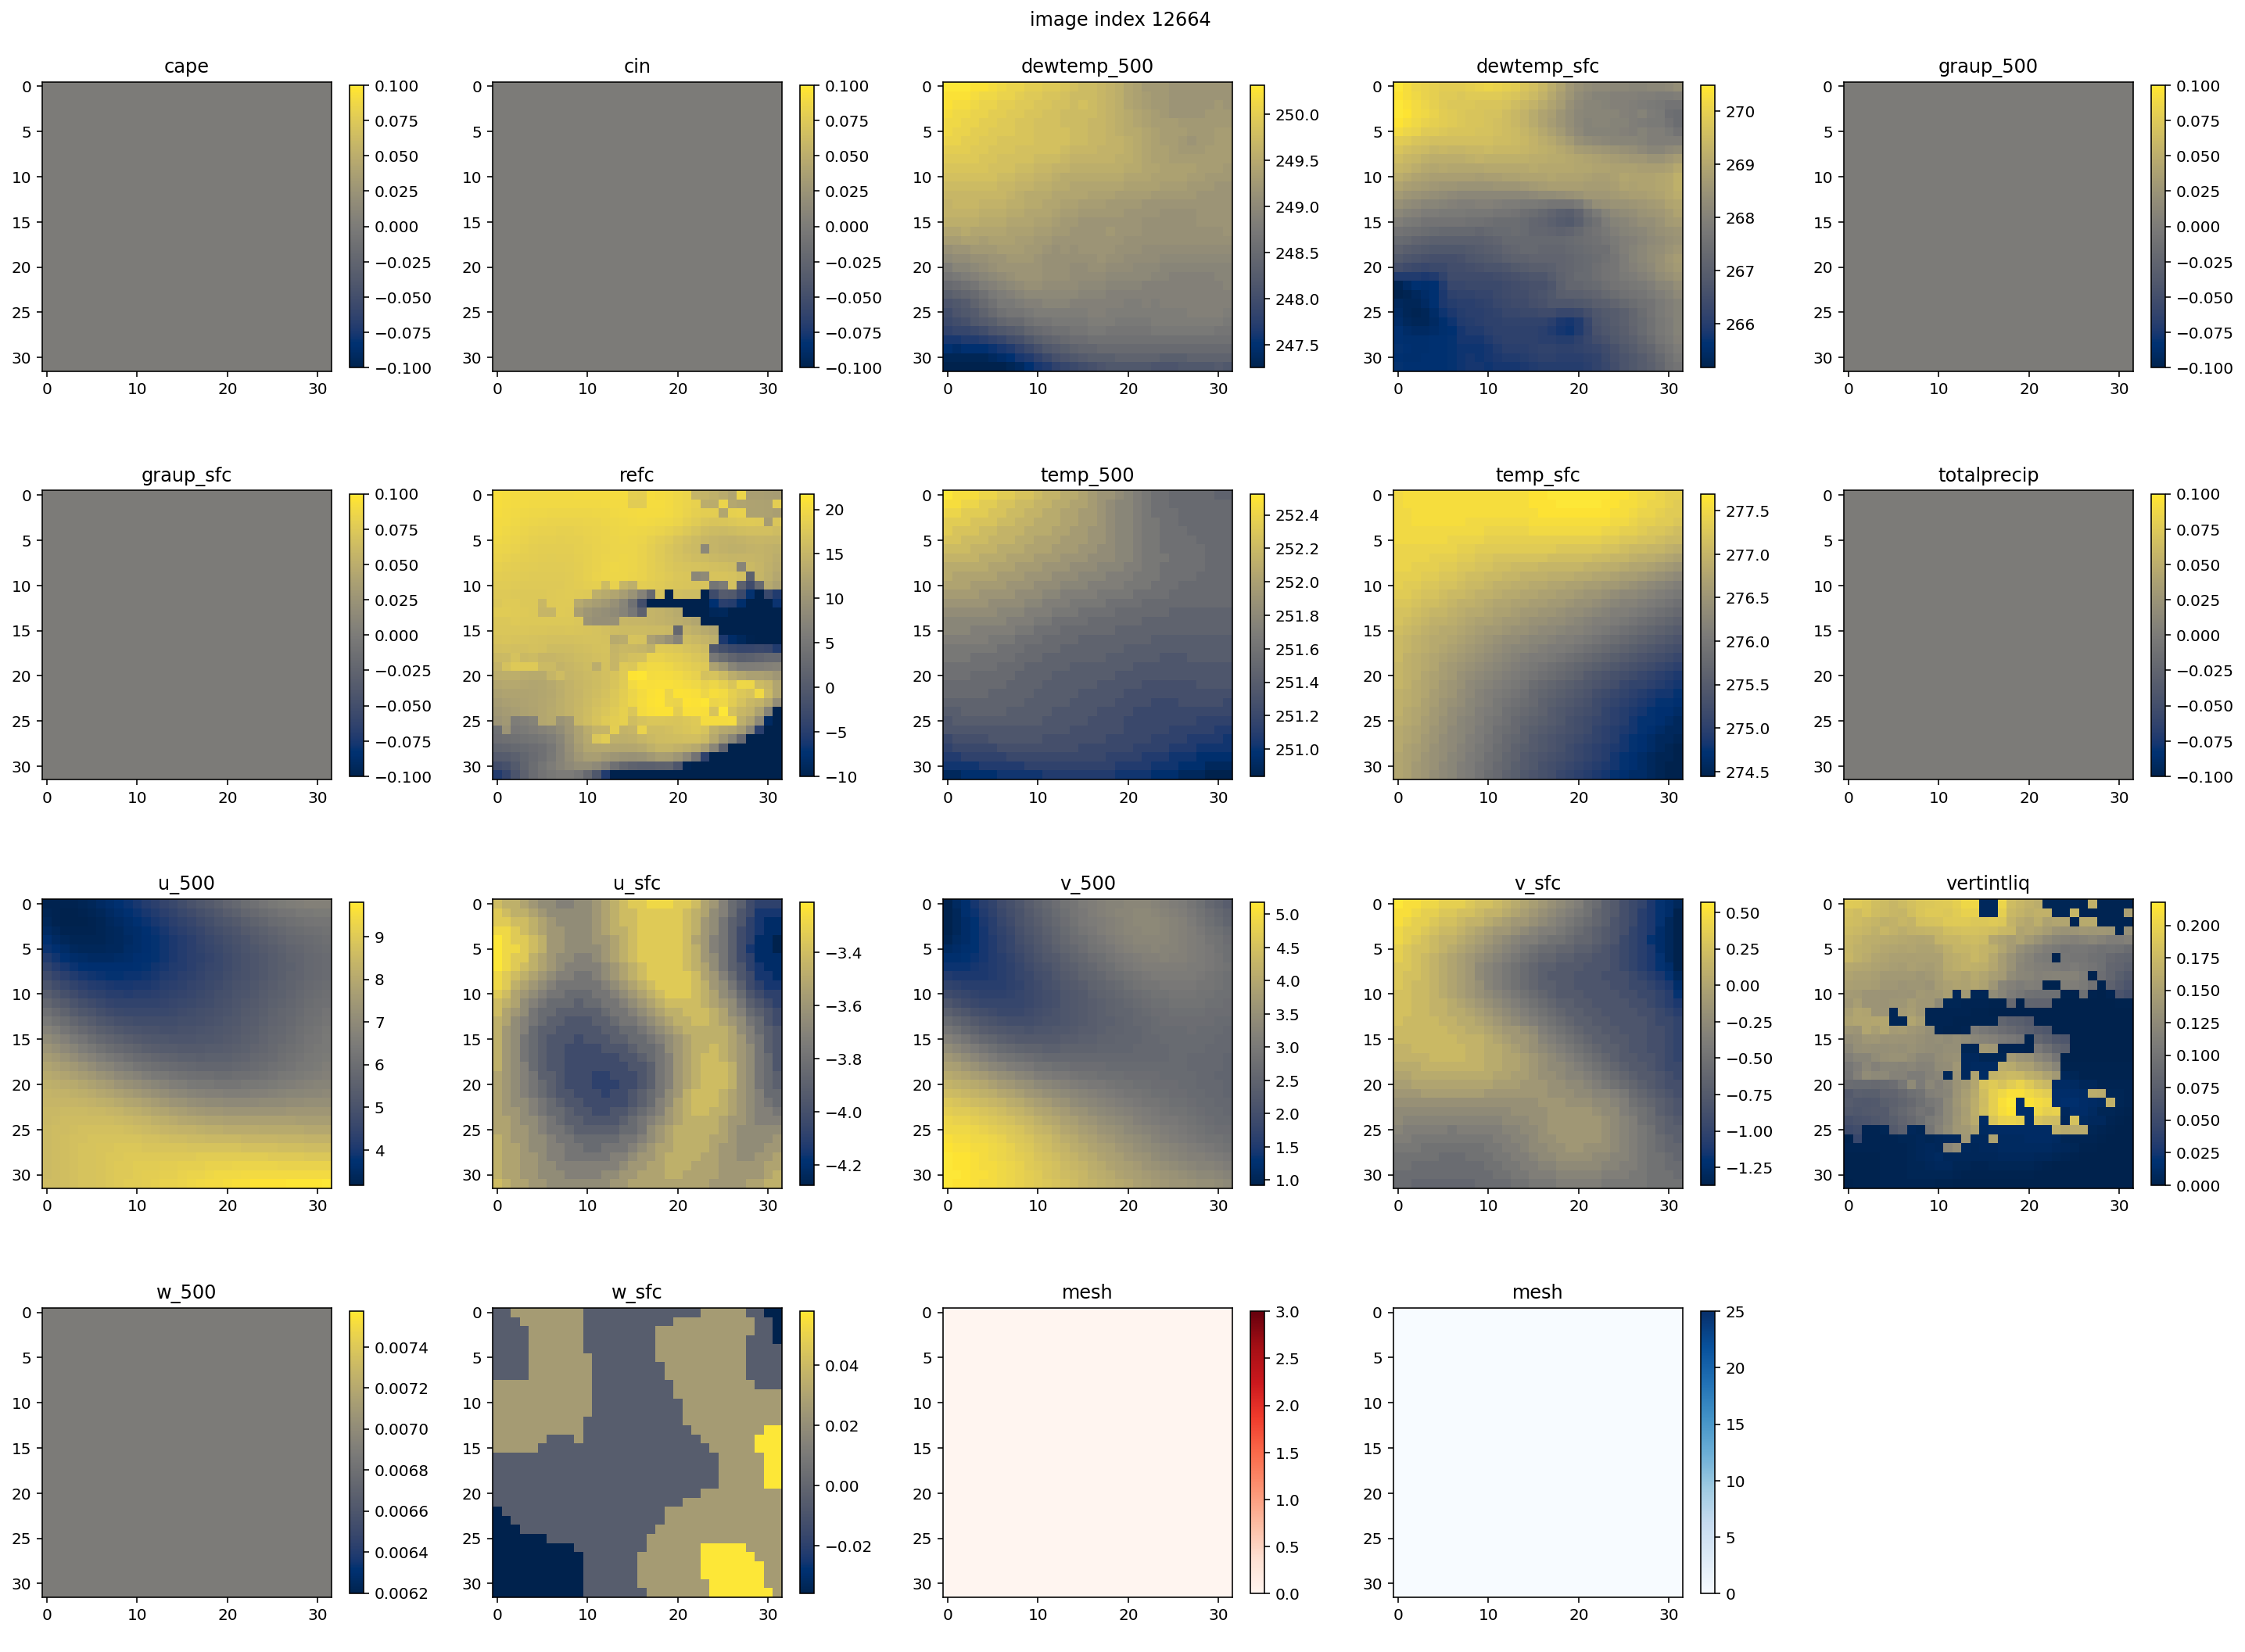

In [6]:
plot_random_patch(patches)

In [13]:
patches.time.values

array([['2016-04-20T14:00:00.000000000'],
       ['2016-05-02T19:00:00.000000000'],
       ['2016-04-30T11:00:00.000000000'],
       ...,
       ['2016-04-10T00:00:00.000000000'],
       ['2016-04-06T11:00:00.000000000'],
       ['2016-05-02T05:00:00.000000000']], dtype='datetime64[ns]')

In [23]:
mesh_90 = patches19.mesh_90.values

In [28]:
mesh_90.min()
len(mesh_90)

250

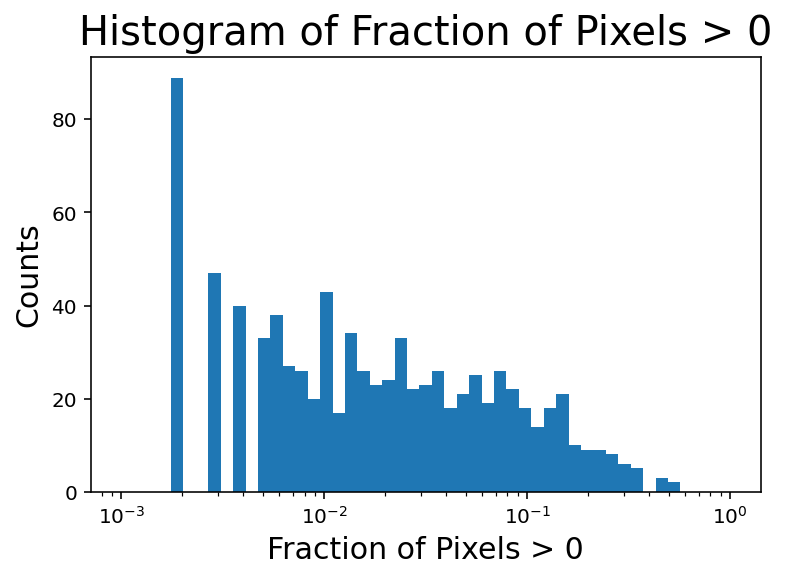

In [32]:
#Plot a histogram of the data
plt.figure()
plt.hist(patches.meshfrac.values.ravel(),np.logspace(-3,0))
plt.semilogx()
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Fraction of Pixels > 0', fontsize=15)
plt.title('Histogram of Fraction of Pixels > 0', fontsize=20)
plt.savefig('c:/Users/jorda/Downloads/Hist_meshfrac.png',dpi=300)

Text(0.5, 0, 'Conditional Mean of MESH_90 > 0')

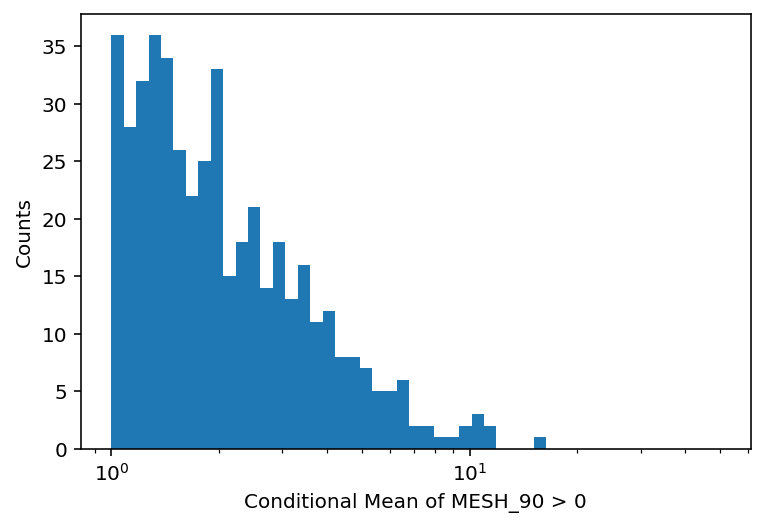

In [12]:
#Plot a histogram of the data
plt.figure()
plt.hist(patches.mesh_90_mean.values.ravel(),np.logspace(0,np.log10(50)))
plt.semilogx()
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Conditional Mean of MESH_90 > 0', fontsize=20)

<ipython-input-31-ca6bcaab3f42>:23: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig('c:/Users/jorda/Downloads/MESH_90_CONUS.png',dpi=300)


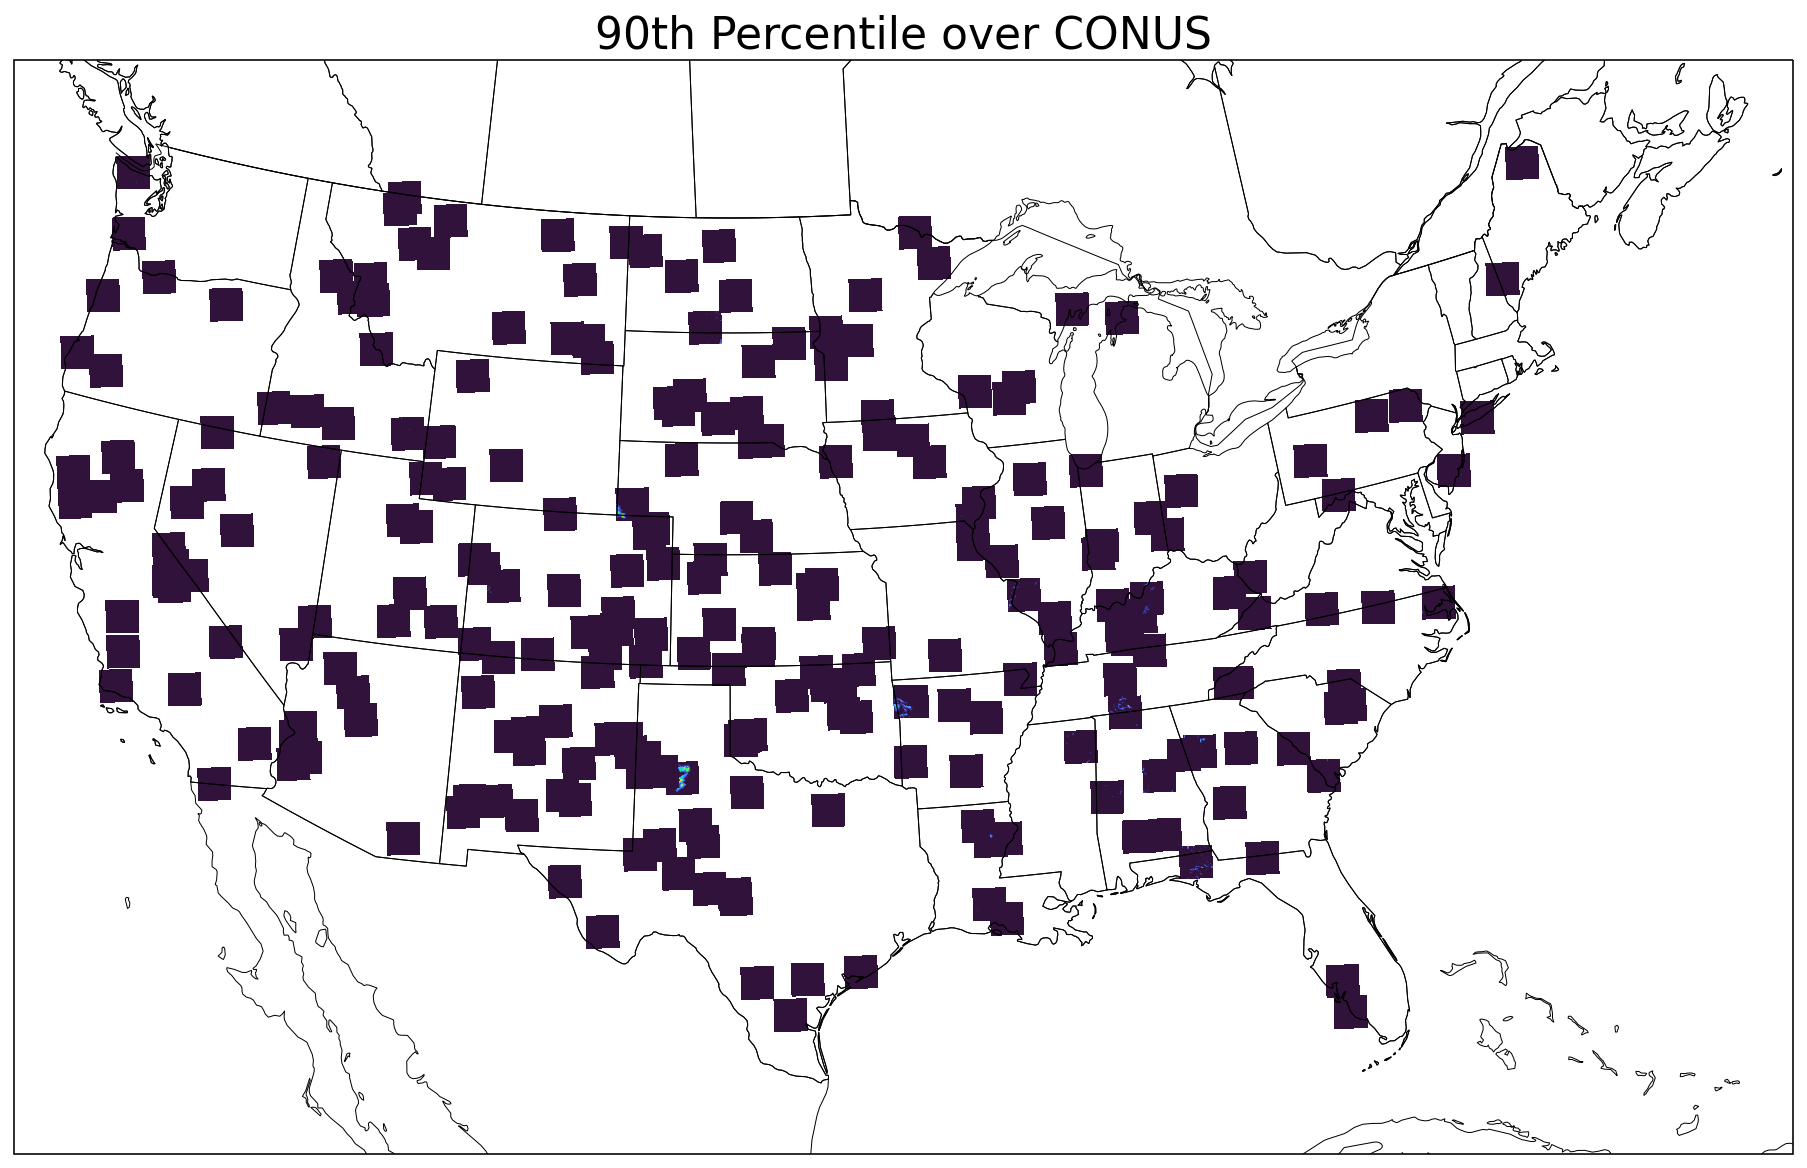

In [31]:
#plot patches over the respective location
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Create the figure and plot background on different axes


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 8), constrained_layout=True,
                          subplot_kw={'projection': crs})


ax.set_extent([240., 290., 22., 50.])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

for i in np.arange(0,patches19.mesh_90.shape[0]):
    ax.pcolormesh(patches19.longitude[i,:,:],patches19.latitude[i,:,:],patches19.mesh_90[i,:,:],vmin=0,vmax=60,transform=ccrs.PlateCarree(),cmap="turbo")
#ax.pcolormesh(patches.longitude[0,:,:],patches.latitude[0,:,:],patches.cin[0,:,:],transform=ccrs.PlateCarree(),cmap='turbo')
#ax.pcolormesh(patches.longitude[2,:,:],patches.latitude[2,:,:],patches.cin[2,:,:],transform=ccrs.PlateCarree(),cmap='turbo')
#ax.pcolormesh(patches.longitude[3,:,:],patches.latitude[3,:,:],patches.cin[3,:,:],transform=ccrs.PlateCarree(),cmap='turbo')

plt.title('90th Percentile over CONUS', fontsize=22)

plt.savefig('c:/Users/jorda/Downloads/MESH_90_CONUS.png',dpi=300)

Text(0.5, 1.0, 'Convective Inhibition')

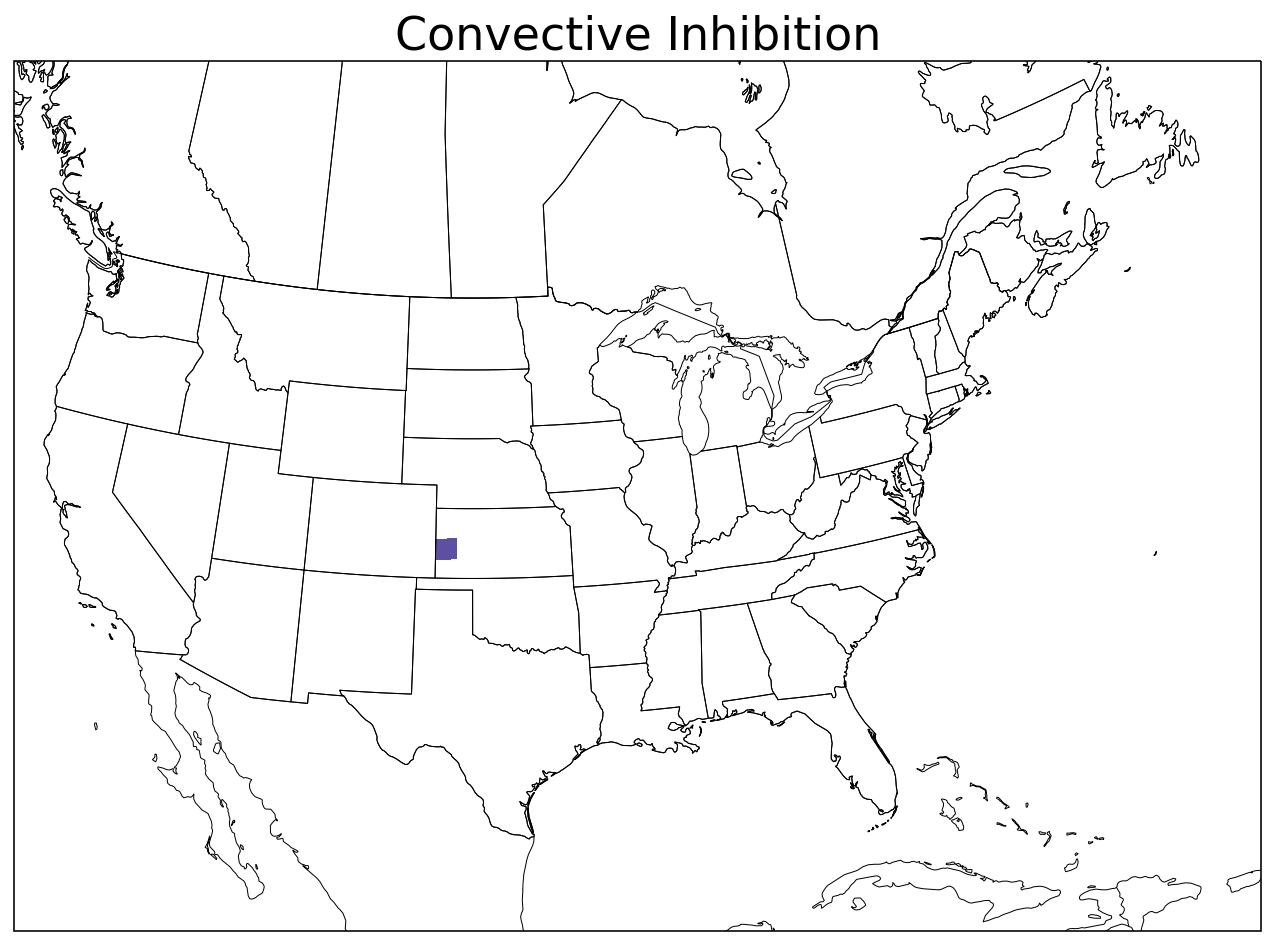

In [21]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Create the figure and plot background on different axes


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 8), constrained_layout=True,
                          subplot_kw={'projection': crs})
ax.set_extent([240., 295., 20., 55.])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)


#ax.pcolormesh(patches.longitude[0,:,:],patches.latitude[0,:,:],patches.cape[0,:,:],transform=ccrs.PlateCarree(),cmap='turbo')
ax.pcolormesh(patches.longitude[170,:,:],patches.latitude[170,:,:],patches.mesh_90[170,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
#ax.pcolormesh(patches.longitude[0,:,:],patches.latitude[0,:,:],patches.cin[0,:,:],transform=ccrs.PlateCarree(),cmap='turbo')
#ax.pcolormesh(patches.longitude[2,:,:],patches.latitude[2,:,:],patches.cin[2,:,:],transform=ccrs.PlateCarree(),cmap='turbo')
#ax.pcolormesh(patches.longitude[3,:,:],patches.latitude[3,:,:],patches.cin[3,:,:],transform=ccrs.PlateCarree(),cmap='turbo')

#plt.title('Cape', fontsize=17)
plt.title('Convective Inhibition', fontsize=23)

#plt.savefig('c:/Users/jorda/Downloads/cin_patch.png',dpi=300)

<ipython-input-30-9e4e2afb041a>:29: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig('c:/Users/jorda/Downloads/cin_patch.png',dpi=300)


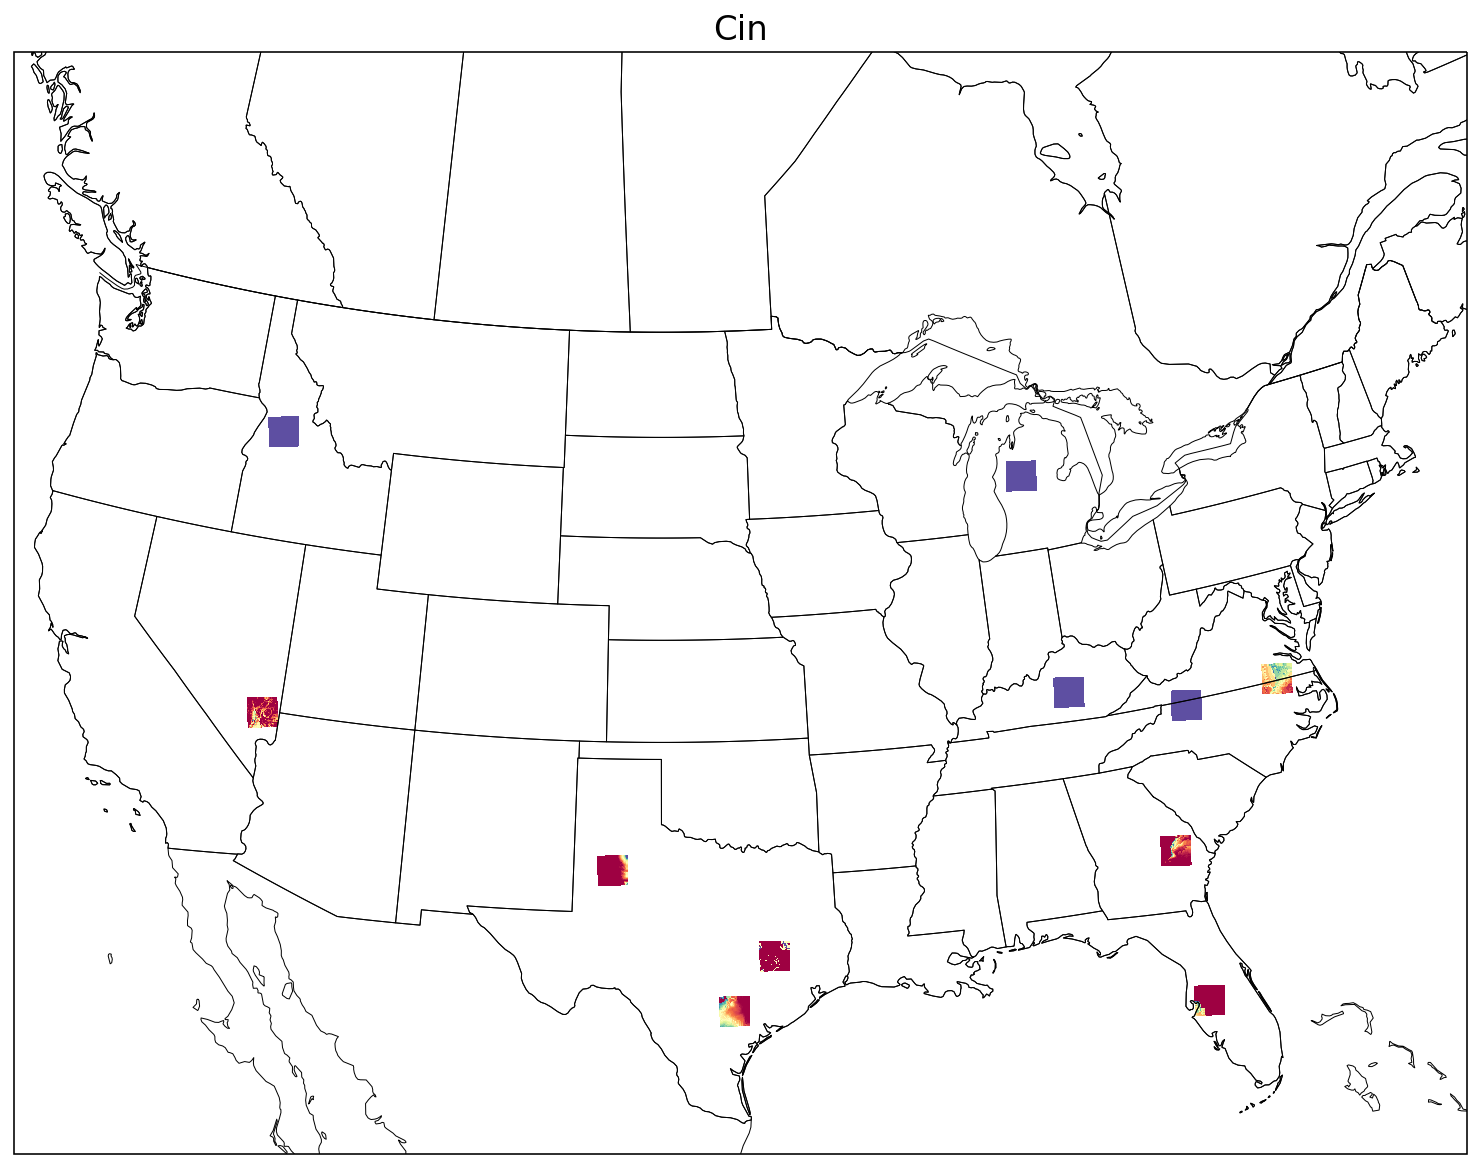

In [30]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Create the figure and plot background on different axes


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 8), constrained_layout=True,
                          subplot_kw={'projection': crs})
ax.set_extent([240., 285., 23., 55.])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)


#ax.pcolormesh(patches.longitude[0,:,:],patches.latitude[0,:,:],patches.cape[0,:,:],transform=ccrs.PlateCarree(),cmap='turbo')
ax.pcolormesh(patches.longitude[0,:,:],patches.latitude[0,:,:],patches.cin[0,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
ax.pcolormesh(patches.longitude[1,:,:],patches.latitude[1,:,:],patches.cin[1,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
ax.pcolormesh(patches.longitude[2,:,:],patches.latitude[2,:,:],patches.cin[2,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
ax.pcolormesh(patches.longitude[3,:,:],patches.latitude[3,:,:],patches.cin[3,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
ax.pcolormesh(patches.longitude[4,:,:],patches.latitude[4,:,:],patches.cin[4,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
ax.pcolormesh(patches.longitude[5,:,:],patches.latitude[5,:,:],patches.cin[5,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
ax.pcolormesh(patches.longitude[6,:,:],patches.latitude[6,:,:],patches.cin[6,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
ax.pcolormesh(patches.longitude[7,:,:],patches.latitude[7,:,:],patches.cin[7,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
ax.pcolormesh(patches.longitude[8,:,:],patches.latitude[8,:,:],patches.cin[8,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
ax.pcolormesh(patches.longitude[9,:,:],patches.latitude[9,:,:],patches.cin[9,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
ax.pcolormesh(patches.longitude[10,:,:],patches.latitude[10,:,:],patches.cin[10,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
#plt.title('Cape', fontsize=17)
plt.title('Cin', fontsize=17)

plt.savefig('c:/Users/jorda/Downloads/cin_patch.png',dpi=300)

<ipython-input-28-8fd68be9bc0a>:19: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig('c:/Users/jorda/Downloads/reflectivity_patch.png',dpi=300)


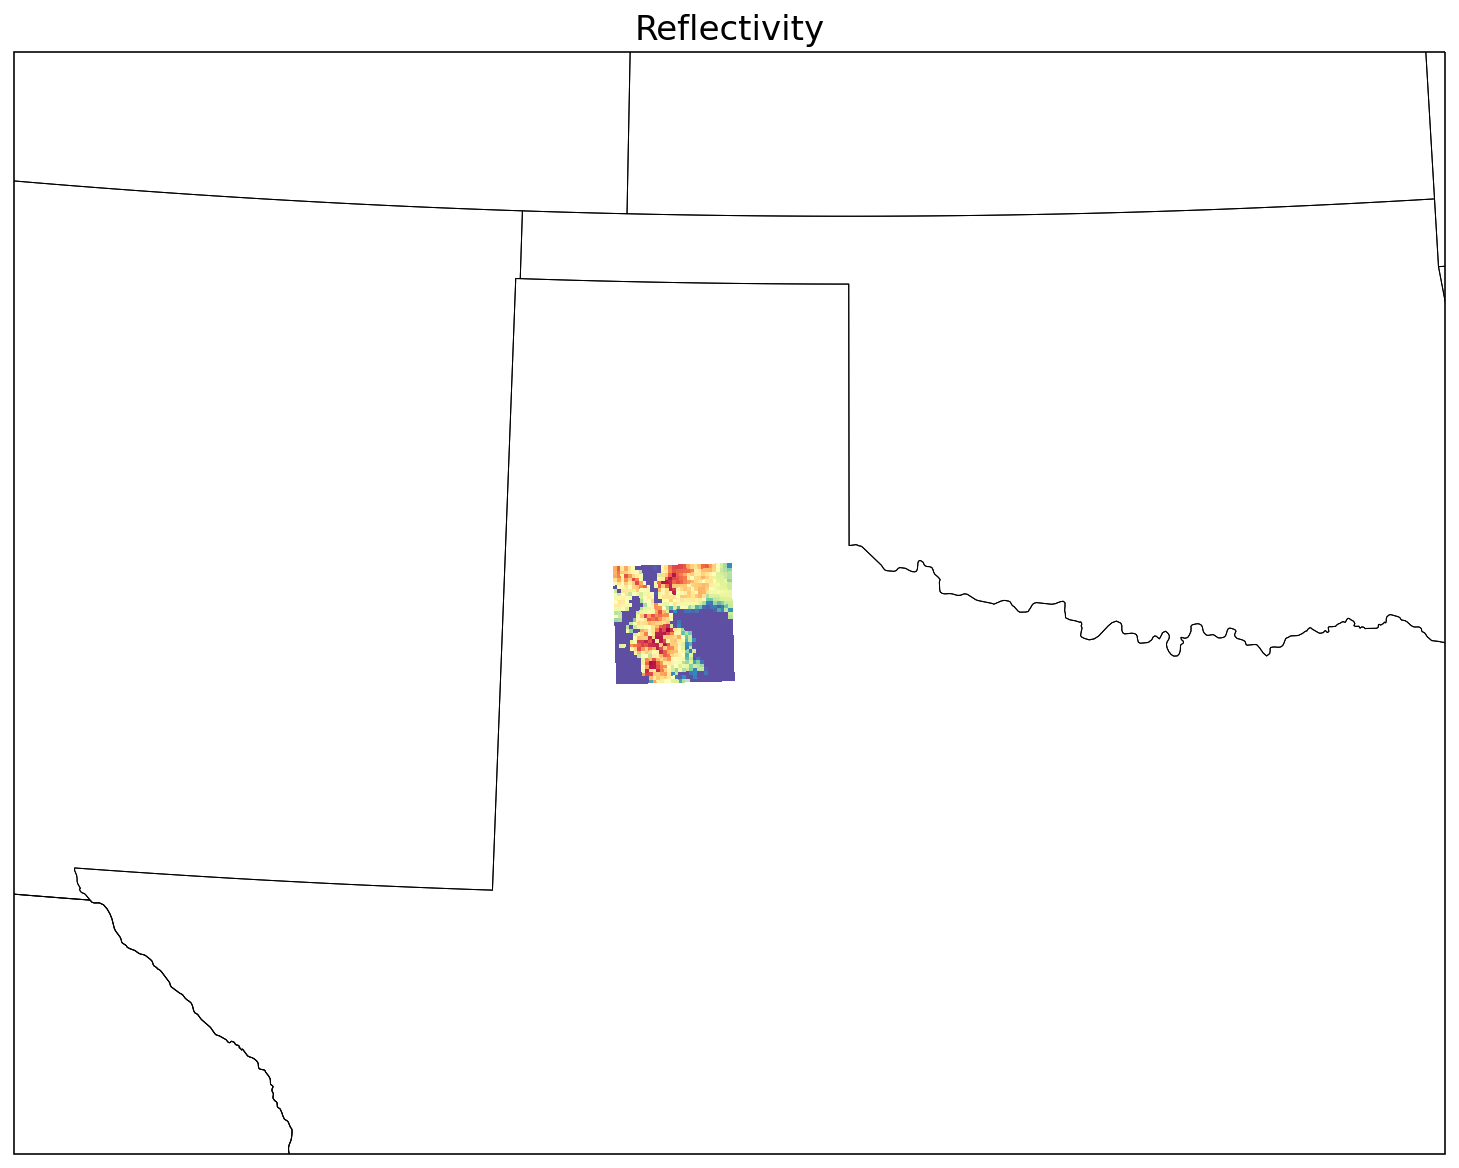

In [28]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Create the figure and plot background on different axes


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 8), constrained_layout=True,
                          subplot_kw={'projection': crs})
ax.set_extent([253., 265., 30., 38.])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)


#ax.pcolormesh(patches.longitude[0,:,:],patches.latitude[0,:,:],patches.cape[0,:,:],transform=ccrs.PlateCarree(),cmap='turbo')
ax.pcolormesh(patches19.longitude[170,:,:],patches19.latitude[170,:,:],patches19.refc[170,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
#plt.title('Cape', fontsize=17)
plt.title('Reflectivity', fontsize=17)

#plt.savefig('c:/Users/jorda/Downloads/reflectivity_patch.png',dpi=300)

Text(0.5, 1.0, 'Reflectivity')

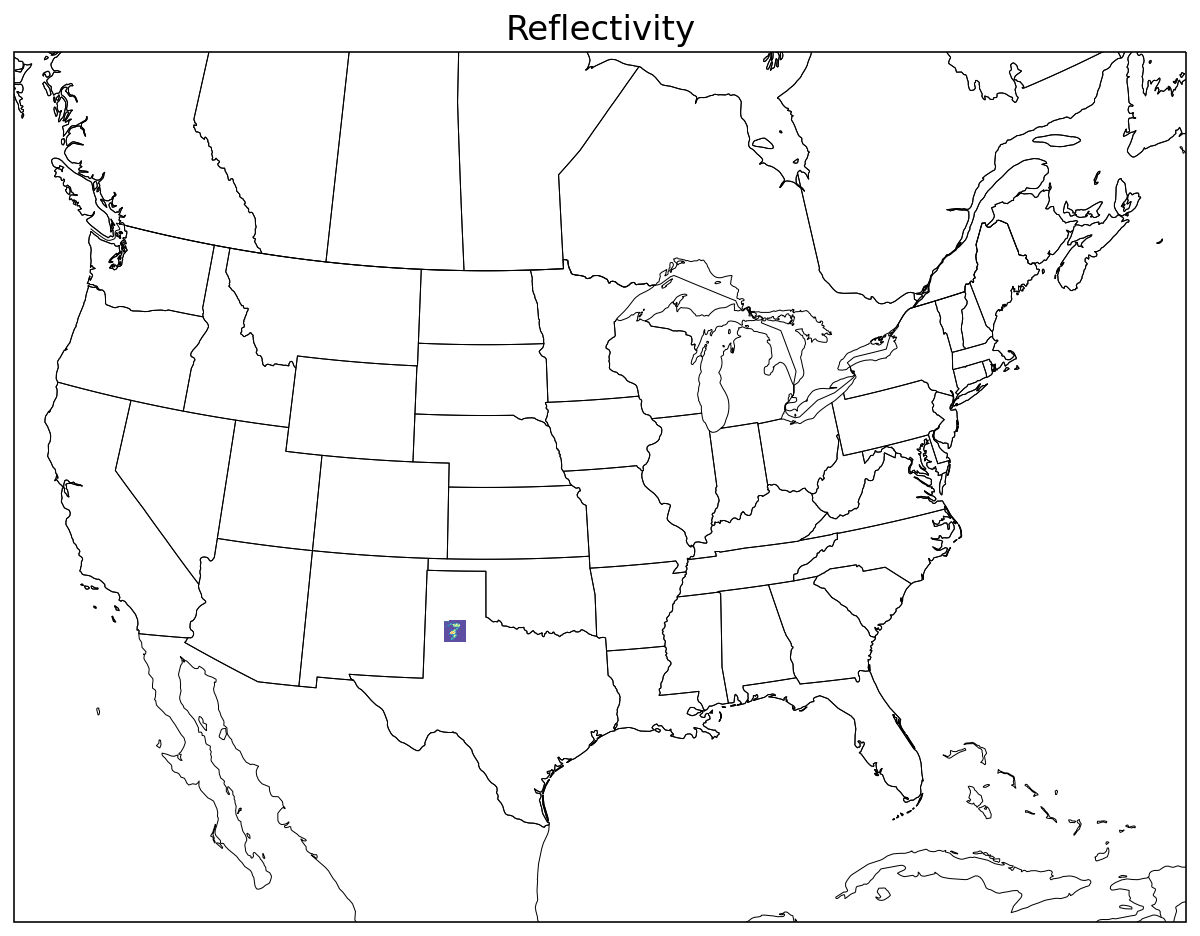

In [40]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Create the figure and plot background on different axes


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 8), constrained_layout=True,
                          subplot_kw={'projection': crs})
ax.set_extent([240., 290., 20., 55.])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)


#ax.pcolormesh(patches.longitude[0,:,:],patches.latitude[0,:,:],patches.cape[0,:,:],transform=ccrs.PlateCarree(),cmap='turbo')
ax.pcolormesh(patches19.longitude[170,:,:],patches19.latitude[170,:,:],patches19.mesh_90[170,:,:],transform=ccrs.PlateCarree(),cmap='Spectral_r')
#plt.title('Cape', fontsize=17)
plt.title('MESH', fontsize=17)

#plt.savefig('c:/Users/jorda/Downloads/reflectivity_patch.png',dpi=300)